In [2]:
# %%
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress
# %%
# generate 1500 random latitude and longitude data as a list of tuples
lats = np.random.uniform(-90.0,90.0,size=1500)
lngs = np.random.uniform(-180.0,180.0,size=1500)

In [3]:
lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)
print(coordinates[:11])

[(-83.09638110869199, 6.71767549040004), (52.64554142692549, 166.5864827768812), (-64.29646749547867, -167.487857956127), (10.61514304554376, -93.49265694759558), (-5.276693692749376, 50.88051003266838), (59.811457254078135, -176.32505055401677), (-78.76794192916887, -151.14312064958725), (79.71167575888583, -39.8281121482311), (28.84932470009926, -18.774251802350932), (-47.05049008586651, -1.5400468718241882), (-62.29156379426996, -95.80640120786188)]


In [4]:
# use citipy module to get nearest city names
cities = list()
for coor in coordinates:
    cities_name = citipy.nearest_city(coor[0], coor[1]).city_name
    # ensure no any duplicate cities
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10], 'Generate', len(cities))

# %%
# use OpenWeather API to request, get, parse JSON to retrieve weather data for each city.

# initial counters for log and sets
record_count = 1 
set_count = 1

['hermanus', 'nikolskoye', 'avarua', 'champerico', 'victoria', 'provideniya', 'mataura', 'tasiilaq', 'los llanos de aridane', 'cape town'] Generate 631


In [5]:
city_data = list()
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print('Beginning Data Retrieval     ')
print("-----------------------------")

# use enumerate() method to loop index and item simutanously 
for i, item in enumerate(cities):
    if i % 50 == 0 and i != 0 :
        record_count = 1  # initialize at every beginning of set
        set_count +=1 # increment set count
    # build URL for API call
    url = basic_url + '&q=' + item
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {item}')
    # increment record count
    record_count +=1

    try: 
        js = requests.get(url).json()
        city_name = item
        city_country = js['sys']['country']
        city_UTCdate = js['dt']
        city_date = datetime.utcfromtimestamp(city_UTCdate).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = js['coord']['lat']
        city_lon = js['coord']['lon']
        city_max_temp = js['main']['temp_max']
        city_humidity = js['main']['humidity']
        city_cload = js['clouds']['all']
        city_wind_speed = js['wind']['speed']
        # append as a list of dictionaries
        city_data.append({'City':city_name, 'Coounty':city_country, 'Date':city_date, 
                        'Lat':city_lat, 'Lng': city_lon,'Max Temp':city_max_temp,
                        'Humidity':city_humidity,'Cloudiness': city_cload,'Wind Speed':city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')
print(len(city_data))


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | champerico
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | jumla
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | ush

Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | kursenai
Processing Record 43 of Set 4 | adre
Processing Record 44 of Set 4 | eureka
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | darhan
Processing Record 49 of Set 4 | cap malheureux
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | weligama
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | sakakah
Processing Record 6 of Set 5 | magadan
Processing Record 7 of Set 5 | dawlatabad
Processing Record 8 of Set 5 | nieves
Processing Record 9 of Set 5 | amapa
Processing Record 10 of Set 5 | peniche
Processing Record 11 of Set 5 | charters towers
Processing Record 12 of Set 5 | ostrovnoy
Processing Record 13 of Set 5 | porto novo
Processing Record 14 of Set 5 | basco
Pr

Processing Record 26 of Set 8 | saint george
Processing Record 27 of Set 8 | rio gallegos
Processing Record 28 of Set 8 | banga
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | kuna
Processing Record 31 of Set 8 | wanlaweyn
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | bolshaya murta
City not found. Skipping...
Processing Record 34 of Set 8 | amarante do maranhao
Processing Record 35 of Set 8 | kaeo
Processing Record 36 of Set 8 | rock sound
Processing Record 37 of Set 8 | tucurui
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | kristiansund
Processing Record 41 of Set 8 | hirara
Processing Record 42 of Set 8 | evensk
Processing Record 43 of Set 8 | dauriya
Processing Record 44 of Set 8 | yulara
Processing Record 45 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 46 of Set 8 | dibulla
Processing Record 47 of Set 8 | hunza
Ci

Processing Record 9 of Set 12 | munxar
Processing Record 10 of Set 12 | pinheiro machado
Processing Record 11 of Set 12 | narsaq
Processing Record 12 of Set 12 | burla
Processing Record 13 of Set 12 | necochea
Processing Record 14 of Set 12 | los arabos
Processing Record 15 of Set 12 | guerrero negro
Processing Record 16 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 17 of Set 12 | paradwip
City not found. Skipping...
Processing Record 18 of Set 12 | bilma
Processing Record 19 of Set 12 | podgorica
Processing Record 20 of Set 12 | son la
Processing Record 21 of Set 12 | san jeronimo
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | tommot
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | lovozero
Processing Record 26 of Set 12 | wukari
Processing Record 27 of Set 12 | puerto armuelles
Processing Record 28 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 29 of Set 12 | lalmohan
Processing Record 30 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,hermanus,ZA,2021-11-17 02:59:32,-34.4187,19.2345,60.91,83,72,5.59
1,nikolskoye,RU,2021-11-17 02:59:32,59.7035,30.7861,37.87,93,100,5.86
2,avarua,CK,2021-11-17 02:59:33,-21.2078,-159.7750,80.65,83,20,16.11
3,champerico,GT,2021-11-17 02:59:33,14.3000,-91.9167,80.04,73,44,5.88
4,victoria,HK,2021-11-17 02:55:40,22.2855,114.1577,77.97,76,41,1.01
5,provideniya,RU,2021-11-17 02:59:33,64.3833,-173.3000,17.71,62,75,8.95
6,mataura,NZ,2021-11-17 02:59:33,-46.1927,168.8643,58.73,45,21,11.18
7,tasiilaq,GL,2021-11-17 02:59:34,65.6145,-37.6368,10.20,66,37,5.17
8,los llanos de aridane,ES,2021-11-17 02:59:34,28.6585,-17.9182,63.12,69,75,5.99
9,cape town,ZA,2021-11-17 02:58:16,-33.9258,18.4232,61.12,79,0,4.61


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1637118128.6335387

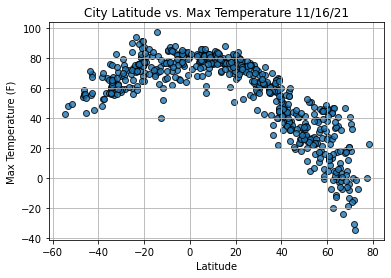

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

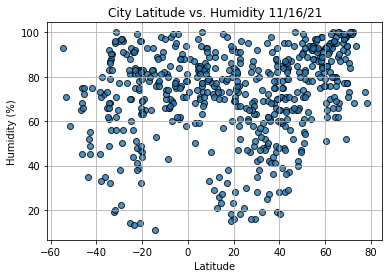

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

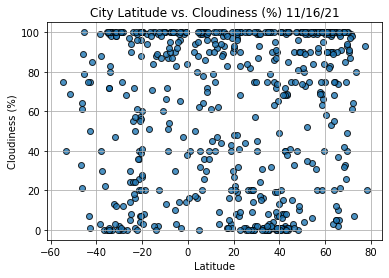

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

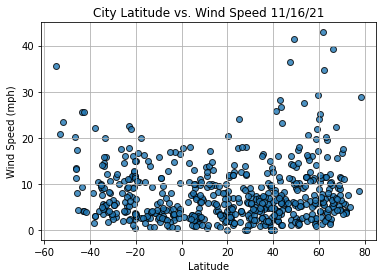

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13


City                         hilo
Coounty                        US
Date          2021-11-17 02:59:35
Lat                       19.7297
Lng                       -155.09
Max Temp                    78.53
Humidity                       93
Cloudiness                     90
Wind Speed                    0.0
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
567     True
568     True
569    False
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Coounty,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,nikolskoye,RU,2021-11-17 02:59:32,59.7035,30.7861,37.87,93,100,5.86
3,champerico,GT,2021-11-17 02:59:33,14.3000,-91.9167,80.04,73,44,5.88
4,victoria,HK,2021-11-17 02:55:40,22.2855,114.1577,77.97,76,41,1.01
5,provideniya,RU,2021-11-17 02:59:33,64.3833,-173.3000,17.71,62,75,8.95
7,tasiilaq,GL,2021-11-17 02:59:34,65.6145,-37.6368,10.20,66,37,5.17


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))